Current Working Directory: /content
Directories in '/content/DATASET/train':
['5', '6', '3', '4', '2', '7', '1']


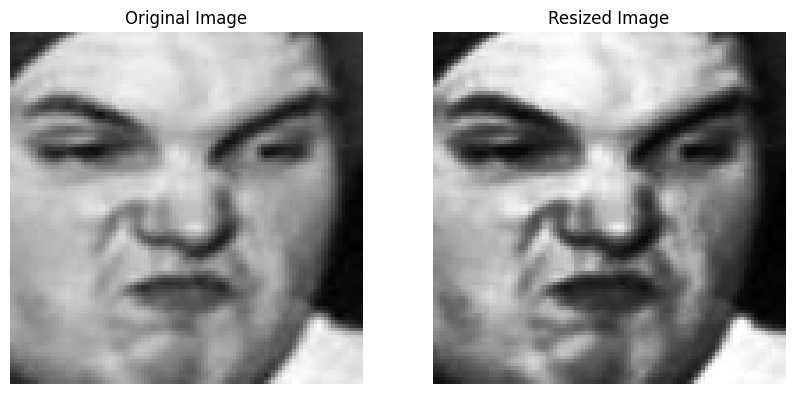

In [21]:
import numpy as np
import cv2
import os
import random
import matplotlib.pyplot as plt

def find_Class(directory_path):
    if not os.path.exists(directory_path):
        raise ValueError(f"The directory '{directory_path}' does not exist.")
    if not os.path.isdir(directory_path):
        raise ValueError(f"The path '{directory_path}' is not a directory.")

    all_entries = os.listdir(directory_path)
    folders = [entry for entry in all_entries if os.path.isdir(os.path.join(directory_path, entry))]

    return folders

current_dir = os.getcwd()
print(f"Current Working Directory: {current_dir}")

# Update the directory path
DIRECTORY = "/content/DATASET/train"
CATAGORIES = []

try:
    folders = find_Class(DIRECTORY)
    print(f"Directories in '{DIRECTORY}':")
    for folder in folders:
        CATAGORIES.append(folder)
except ValueError as e:
    print(e)

print(CATAGORIES)

data = []

# Load and pre-process training data
for categories in CATAGORIES:
    folder = os.path.join(DIRECTORY, categories)
    label = CATAGORIES.index(categories)

    for img in os.listdir(folder):
        img = os.path.join(folder, img)
        img_arr = cv2.imread(img)
        if img_arr is not None:  # Check if the image is successfully loaded
            img_arr_gray = cv2.cvtColor(img_arr, cv2.COLOR_BGR2GRAY)
            img_arr_eq = cv2.equalizeHist(img_arr_gray)
            img_arr_resized = cv2.resize(img_arr_eq, (100, 100))

            # For visualization, also keep the original size image
            img_arr_original = cv2.resize(img_arr_gray, (100, 100))  # resize for visualization
            data.append([img_arr_original, img_arr_resized, label])
        else:
            print(f"Failed to load image {img}")

# Load and pre-process test data
DIRECTORY = "/content/DATASET/test"
for categories in CATAGORIES:
    folder = os.path.join(DIRECTORY, categories)
    label = CATAGORIES.index(categories)

    for img in os.listdir(folder):
        img = os.path.join(folder, img)
        img_arr = cv2.imread(img)
        if img_arr is not None:  # Check if the image is successfully loaded
            img_arr_gray = cv2.cvtColor(img_arr, cv2.COLOR_BGR2GRAY)
            img_arr_eq = cv2.equalizeHist(img_arr_gray)
            img_arr_resized = cv2.resize(img_arr_eq, (100, 100))

            # For visualization, also keep the original size image
            img_arr_original = cv2.resize(img_arr_gray, (100, 100))  # resize for visualization
            data.append([img_arr_original, img_arr_resized, label])
        else:
            print(f"Failed to load image {img}")

# Prepare data for model
x = []
y = []

for features, resized, label in data:
    x.append(resized)
    y.append(label)

X = np.array(x)
Y = np.array(y)

X = X / 255

# Visualization of image before and after resizing
def plot_images(original, resized):
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes[0].imshow(original, cmap='gray')
    axes[0].set_title('Original Image')
    axes[0].axis('off')

    axes[1].imshow(resized, cmap='gray')
    axes[1].set_title('Resized Image')
    axes[1].axis('off')

    plt.show()

# Visualize some sample images from the data
sample_data = random.choice(data)
original_image, resized_image, _ = sample_data
plot_images(original_image, resized_image)
